In [5]:
#Library
?read.table

In [2]:
# Changement dossier de travail
setwd ("~/Documents/ResultatsCytosim/oscillations/Exploration2/simul_osci/metaphase1kt_97MTseuil_20cohesinStiffness_20KTMTstiffness/run1/")


# Visualisation individuelle


In [23]:
# Lecture des datas
data_solid = read.table("solid.txt", head = TRUE, dec = '.', stringsAsFactors = FALSE)

data_fiber_left  = read.table("fiber:microtubule_interdigite_spb1.txt", head = TRUE, dec = '.', stringsAsFactors = FALSE, fill=TRUE)
data_fiber_right = read.table("fiber:microtubule_interdigite_spb2.txt", head = TRUE, dec = '.', stringsAsFactors = FALSE,fill=TRUE)

data_klp9 = read.table("couple:klp9.txt", head = TRUE, dec = '.', stringsAsFactors = FALSE)
data_ase1 = read.table("couple:ASE1.txt", head = TRUE, dec = '.', stringsAsFactors = FALSE)

x_spb_left  = data_solid$x
y_spb_left  = data_solid$y
x_spb_right = data_solid$x.1
y_spb_right = data_solid$y.1

In [24]:
# Nombre couple attache
nb_couple_attache = data_klp9$attached.attached + data_ase1$attached.attached

# Taille du fuseau 
spindle_size = sqrt((x_spb_right - x_spb_left)^2 + (y_spb_right - y_spb_left)^2)

In [25]:
# Calcul de la taille des fibres
x_start_fiber = seq(3, 34, 5)
x_end_fiber   = seq(5, 36, 5)
y_start_fiber = seq(4, 35, 5)
y_end_fiber   = seq(6, 37, 5)

size_fibres_left  = (sqrt((data_fiber_left[x_end_fiber]-data_fiber_left[x_start_fiber])^2+(data_fiber_left[y_start_fiber]-data_fiber_left[y_end_fiber])^2))
size_fibres_rigth = (sqrt((data_fiber_right[x_end_fiber]-data_fiber_right[x_start_fiber])^2+(data_fiber_right[y_start_fiber]-data_fiber_right[y_end_fiber])^2))

# Remplacement des NA par 0
size_fibres_left  = replace(size_fibres_left,  is.na(size_fibres_left),0)
size_fibres_rigth = replace(size_fibres_rigth, is.na(size_fibres_rigth),0)

# Taille de la fibre la plus grande partant de chaque SPB
size_fibre_left_max  = apply(size_fibres_left, 1, max)
size_fibre_rigth_max = apply(size_fibres_rigth, 1, max)

# Taille zone interdigite
# !!!! correction du calcul (penser au cas si les deux SPB ne sont pas alignés)
#interdigite_size =sqrt() ((x_spb_right - size_fibre_right_max) - (x_spb_left + size_fibre_left_max))^2 + 

ERROR: Error in parse(text = x, srcfile = src): <text>:21:0: unexpected end of input
19: # !!!! correction du calcul (penser au cas si les deux SPB ne sont pas alignés)
20: interdigite_size =sqrt() ((x_spb_right - size_fibre_right_max) - (x_spb_left + size_fibre_left_max))^2 + 
   ^


ERROR: Error in xy.coords(x, y): objet 'interdigite_size' introuvable


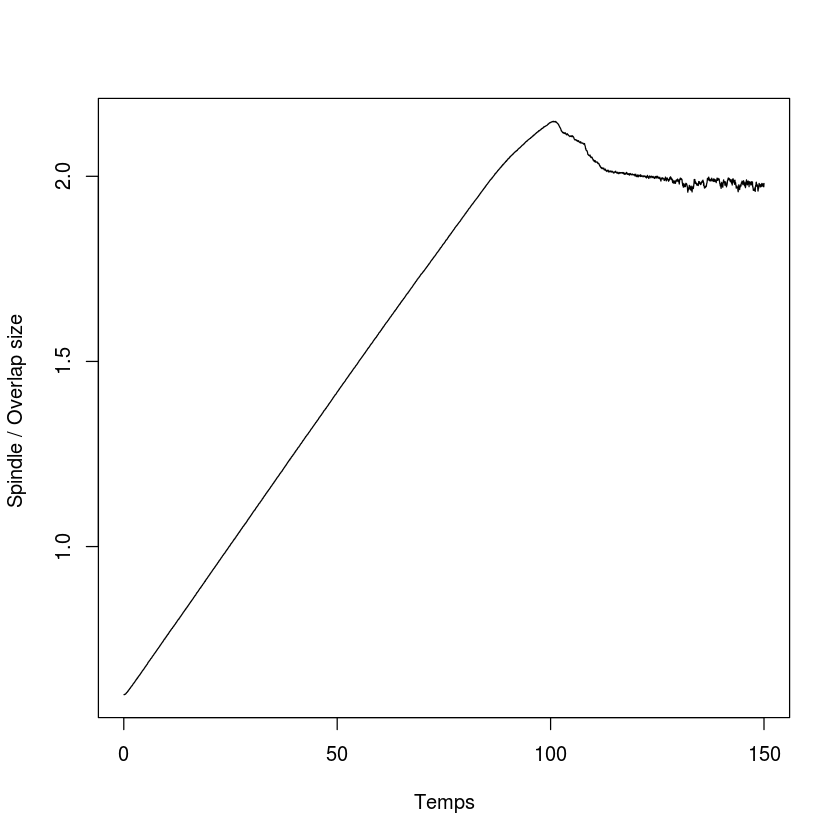

In [26]:
plot  (data_solid$time, spindle_size, type = 'l', col = 'black', xlab = "Temps", ylab = "Spindle / Overlap size ")
lines (data_solid$time, interdigite_size, type = 'l', col = 'red')

In [29]:
par(mfrow = c(2,1))

#plot (spindle_size, (interdigitated_size*100/spindle_size), pch = 4,type='l', 
#      xlab = "spindle size", ylab = "%interdigite" , xlim = c(0,2))

plot (spindle_size, data_moteur$attached.attached, pch = 4,type='l',
      xlab = "%interdigite", ylab = "Nombre couple attache", xlim=c(0,2),  ylim=c(0,500), col='red')
lines(spindle_size, data_crosslink$attached.attached)

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): objet 'data_moteur' introuvable
